# 01. 시각화의 두 가지 목적

`-` 목적 1 : 분석에 도움이 된다

* 일반적인 데이터프레임을 보는 것 보다 그래프를 보고 패턴을 찾아내면 이후에 어떤 분석을 할 지 찾아낼 수 있다.

* 또한, 보이지 않는 것(`이상치, 영향치`)들을 파악할 수 있음

`-` 목적 2 : 리포팅에 도움이 된다.

*  ex : 기획팀에게 보고서를 전달할 때
    * 그래프를 기반으로 보고서를 작성해서 커뮤니케이션을 원할하게 함.

***

# 02. 선그래프

`-` 변화를 보여주기에 적합한 그래프

* ex : 매년 변화되는 아이의 키, 매출 변화 등...

In [2]:
import pandas as pd

%matplotlib inline

`-` 각 방송사의 시청률 데이터 시각화

In [4]:
df = pd.read_csv("data/broadcast.csv", index_col = 0)
df

,KBS,MBC,SBS,TV CHOSUN,JTBC,Channel A,MBN
2011,35.951,18.374,11.173,9.102,7.380,3.771,2.809
2012,36.163,16.022,11.408,8.785,7.878,5.874,3.310
2013,31.989,16.778,9.673,9.026,7.810,5.350,3.825
2014,31.210,15.663,9.108,9.440,7.490,5.776,4.572
2015,27.777,16.573,9.099,9.940,7.267,6.678,5.520
2016,27.583,14.982,8.669,9.829,7.727,6.624,5.477
2017,26.890,12.465,8.661,8.886,9.453,6.056,5.215


`-` `pandas`의 `plot method` 를 이용

* 사실 `kind`인자를 통해 어떤 그래프를 그릴지 전달해줘야 하는데 `line plot`은 `default`로 인자를 전달안해도 된다.

<AxesSubplot:>

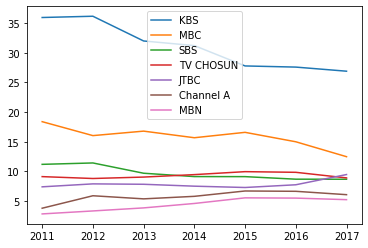

In [5]:
df.plot()

`-` 특정 방송사에 대해서만 시각화

<AxesSubplot:>

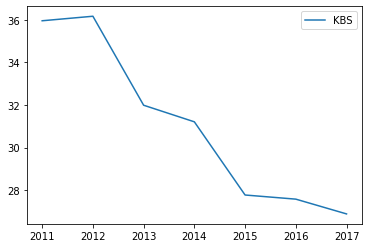

In [7]:
df.plot(y = "KBS")

`-` 두 개 방송사에 대한 그래프 그리기

<AxesSubplot:>

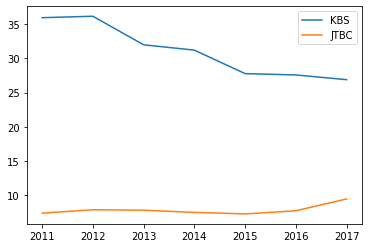

In [8]:
df.plot(y = ["KBS", "JTBC"])

<AxesSubplot:>

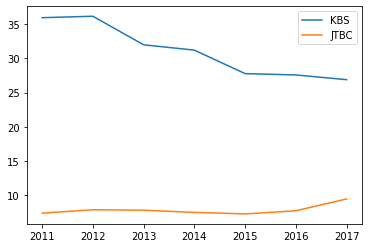

In [9]:
df[["KBS", "JTBC"]].plot()

`-` seris로 그리기

<AxesSubplot:>

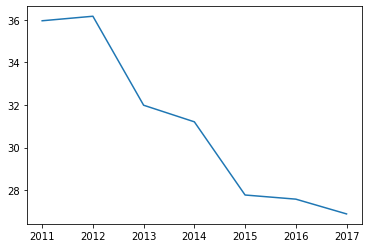

In [10]:
df["KBS"].plot()

## 실습 1. gdp 데이터

한국(Korea_Rep), 미국(United_States), 영국(United_Kingdom), 독일(Germany), 중국(China), 일본(Japan)의 GDP 그래프 그리기

<AxesSubplot:>

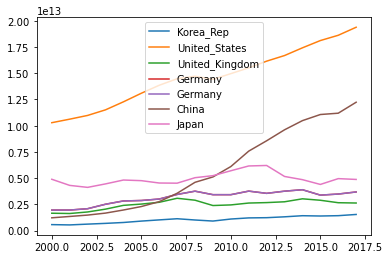

In [15]:
import pandas as pd

%matplotlib inline

df = pd.read_csv("data/gdp.csv",index_col = 0)

df.plot(y = ["Korea_Rep","United_States", 
                "United_Kingdom","Germany", 
                "Germany", "China", "Japan"])

***

# 03. 막대 그래프

`-` 카테고리 비교를 위해 사용

* ex : 연령별, 성별 선호도 조사

In [18]:
import pandas as pd

%matplotlib inline

In [21]:
df = pd.read_csv("data/sports.csv", index_col = 0)
df

,Male,Female
Swimming,103,178
Baseball,363,289
Basketball,151,97
Golf,154,232
Soccer,413,109
Bowling,88,129


<AxesSubplot:>

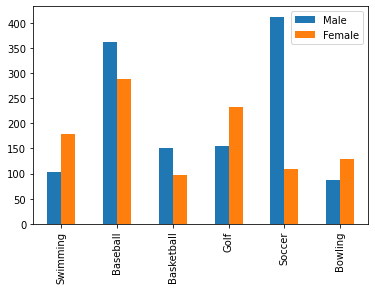

In [22]:
df.plot(kind = "bar")

`-` 가로 그래프 그리기

<AxesSubplot:>

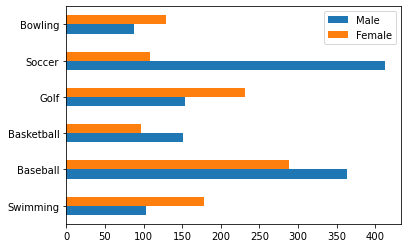

In [23]:
df.plot(kind = "barh")

`-` 그래프 `stack`

<AxesSubplot:>

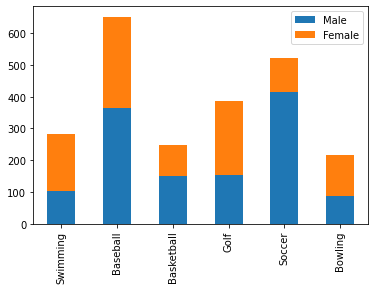

In [24]:
df.plot(kind = "bar", stacked = True)

`-` 특정 범주에 대한 결과만 보여주기

<AxesSubplot:>

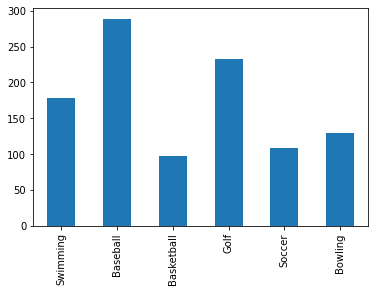

In [28]:
df["Female"].plot(kind = "bar")

## 실습 1

`-` 실리콘 밸리 남자 매지너의 인종 분포 그리기

<AxesSubplot:xlabel='race_ethnicity'>

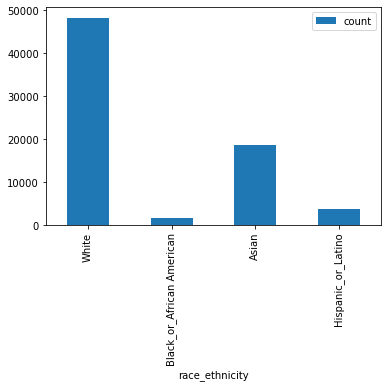

In [55]:
%matplotlib inline
import pandas as pd

df = pd.read_csv('data/silicon_valley_summary.csv')

df.loc[(df["job_category"] == "Managers") & (df.gender == "Male") & 
       (df["race_ethnicity"] != "All"), 
                   ["count", "race_ethnicity"]].plot(kind = "bar", x = "race_ethnicity", y= "count")


***

# 04. 파이 그레프

`-` 절대적인 수치보다 비율을 표현하기 적합한 그래프

In [153]:
df = pd.read_csv("data/broadcast.csv", index_col = 0)
df

,KBS,MBC,SBS,TV CHOSUN,JTBC,Channel A,MBN
2011,35.951,18.374,11.173,9.102,7.380,3.771,2.809
2012,36.163,16.022,11.408,8.785,7.878,5.874,3.310
2013,31.989,16.778,9.673,9.026,7.810,5.350,3.825
2014,31.210,15.663,9.108,9.440,7.490,5.776,4.572
2015,27.777,16.573,9.099,9.940,7.267,6.678,5.520
2016,27.583,14.982,8.669,9.829,7.727,6.624,5.477
2017,26.890,12.465,8.661,8.886,9.453,6.056,5.215


`-` 2017년 방송사별 비율 그래프 그리기

<AxesSubplot:ylabel='2017'>

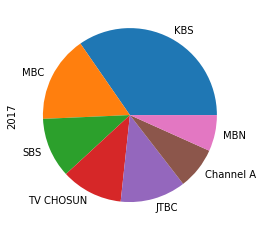

In [157]:
df.loc[2017].plot(kind = "pie")

## 실습 1

어도비 전체 직원들의 직군 분포를 파이 그래프로 그리

In [197]:
df

,company,year,race,gender,job_category,count
0,23andMe,2016,Hispanic_or_Latino,male,Executives,0
1,23andMe,2016,Hispanic_or_Latino,male,Managers,1
2,23andMe,2016,Hispanic_or_Latino,male,Professionals,7
3,23andMe,2016,Hispanic_or_Latino,male,Technicians,0
4,23andMe,2016,Hispanic_or_Latino,male,Sales workers,0
...,...,...,...,...,...,...
4435,Sanmina,2016,Overall_totals,NaN,laborers and helpers,4
4436,Sanmina,2016,Overall_totals,NaN,Service workers,57
4437,Sanmina,2016,Overall_totals,NaN,Totals,5205
4438,Sanmina,2016,Overall_totals,NaN,Previous_totals,5615


### sol1

`-` 일단 내가 풀어봤는데 그래프가 살짝 각도가 이상하게 나옴

In [226]:
%matplotlib inline
import pandas as pd

df = pd.read_csv('data/silicon_valley_details.csv')


df1 = df.loc[(df["company"] == "Adobe") & (df["race"] == "Overall_totals") & (df["count"] !=0)].\
        groupby("job_category", as_index = False)[["count"]].sum()

df1.loc[map(lambda x : x not in ["Previous_totals", "Totals"],
        df1["job_category"])].set_index("job_category")

,count
job_category,
Administrative support,323
Executives,93
Managers,2448
Professionals,3028
Sales workers,1270


### sol2

In [220]:
%matplotlib inline
import pandas as pd

df = pd.read_csv("data/silicon_valley_details.csv")
df

,company,year,race,gender,job_category,count
0,23andMe,2016,Hispanic_or_Latino,male,Executives,0
1,23andMe,2016,Hispanic_or_Latino,male,Managers,1
2,23andMe,2016,Hispanic_or_Latino,male,Professionals,7
3,23andMe,2016,Hispanic_or_Latino,male,Technicians,0
4,23andMe,2016,Hispanic_or_Latino,male,Sales workers,0
...,...,...,...,...,...,...
4435,Sanmina,2016,Overall_totals,NaN,laborers and helpers,4
4436,Sanmina,2016,Overall_totals,NaN,Service workers,57
4437,Sanmina,2016,Overall_totals,NaN,Totals,5205
4438,Sanmina,2016,Overall_totals,NaN,Previous_totals,5615


In [222]:
boolean_adobe = df['company'] == 'Adobe'
boolean_all_races = df['race'] == 'Overall_totals'
df[boolean_adobe & boolean_all_races]

,company,year,race,gender,job_category,count
333,Adobe,2016,Overall_totals,NaN,Executives,93
334,Adobe,2016,Overall_totals,NaN,Managers,2448
335,Adobe,2016,Overall_totals,NaN,Professionals,3028
336,Adobe,2016,Overall_totals,NaN,Technicians,0
337,Adobe,2016,Overall_totals,NaN,Sales workers,1270
338,Adobe,2016,Overall_totals,NaN,Administrative support,323
339,Adobe,2016,Overall_totals,NaN,Craft workers,0
340,Adobe,2016,Overall_totals,NaN,operatives,0
341,Adobe,2016,Overall_totals,NaN,laborers and helpers,0
342,Adobe,2016,Overall_totals,NaN,Service workers,0


In [223]:
boolean_adobe = df['company'] == 'Adobe'
boolean_all_races = df['race'] == 'Overall_totals'
boolean_count = df['count'] != 0
boolean_job_category = (df['job_category'] != 'Totals') & (df['job_category'] != 'Previous_totals')

df_adobe = df[boolean_adobe & boolean_all_races & boolean_count & boolean_job_category]
df_adobe

,company,year,race,gender,job_category,count
333,Adobe,2016,Overall_totals,NaN,Executives,93
334,Adobe,2016,Overall_totals,NaN,Managers,2448
335,Adobe,2016,Overall_totals,NaN,Professionals,3028
337,Adobe,2016,Overall_totals,NaN,Sales workers,1270
338,Adobe,2016,Overall_totals,NaN,Administrative support,323


In [229]:
df_adobe.set_index('job_category', inplace=True)

<AxesSubplot:ylabel='count'>

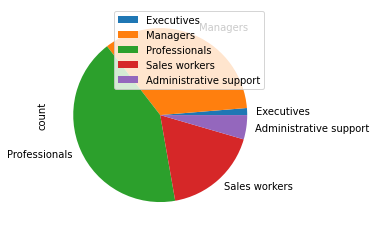

In [231]:
df_adobe.plot(kind='pie', y= 'count')

`-`  틀린 이유 : 굳이 count가 되어 있는 테이블을 `groupby`로 `sum`하는 과정에서 계산이 잘못된 거 같음..

* 항상 데이터를 먼저 뜯어보는 습관을 기르자...

***

# 05. 히스토그램

`-` 연속형 데이터에 대한 분포를 나타내는 그래프

* `bins, breaks, nbins` 등과 같은 인자를 이용하여 범위를 설정 후 그래프를 그림

In [232]:
import pandas as pd

%matplotlib inline

In [234]:
df = pd.read_csv("data/body.csv")

In [236]:
df.head()

,Number,Height,Weight
0,1,176.0,85.2
1,2,175.3,67.7
2,3,168.6,75.2
3,4,168.1,67.1
4,5,175.3,63.0


* `bins` : 묶을 그룹의 개수

<AxesSubplot:ylabel='Frequency'>

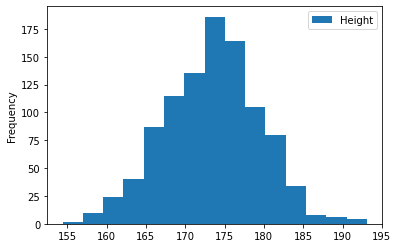

In [237]:
df.plot(kind = "hist", y = "Height", bins = 15)

***

# 06. 박스 플롯

`-` 데이터의 분포를 살펴보는 두 번째 방법

In [238]:
import pandas as pd
%matplotlib inline

In [241]:
df = pd.read_csv("data/exam.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


`-` 기초통계량 값 확인

In [243]:
df["math score"].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

<AxesSubplot:>

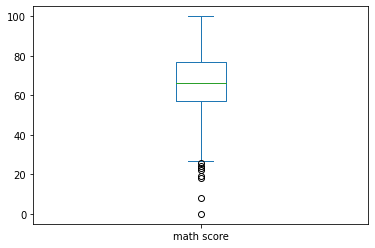

In [244]:
df.plot(kind = "box", y = "math score")

`-` 여러 점수에 대한 그래프 그리기

<AxesSubplot:>

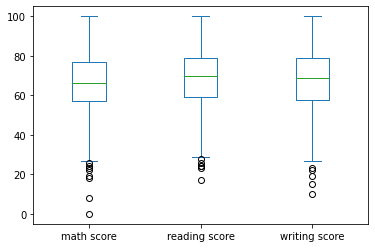

In [245]:
df.plot(kind = "box", y = ["math score", "reading score", "writing score"])

`-` 수학 성적이 대체로 좀 낮고, 읽기 점수가 대체로 높다.

`-` 또한, 읽기 점수는 다른 점수들 보다 값이 덜 분산되어 있음

`-` 상위 25%와 하위 25% 학생들은 모든 부분에 점수에서 값이 굉장히 분산되어 있음

***

# 07. 산점도

`-` 변수 간 상관관계를 보여주기 적합한 그래프

In [246]:
import pandas as pd
%matplotlib inline

df = pd.read_csv("data/exam.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


`-` 수학을 잘하는 학생은 읽기도 잘하는가?

<AxesSubplot:xlabel='math score', ylabel='reading score'>

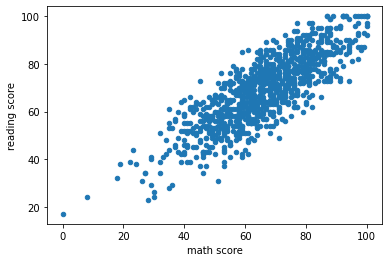

In [249]:
df.plot(x = "math score", y = "reading score", kind = "scatter")

`-` 수학 점수와 쓰기 점수 관계

<AxesSubplot:xlabel='math score', ylabel='writing score'>

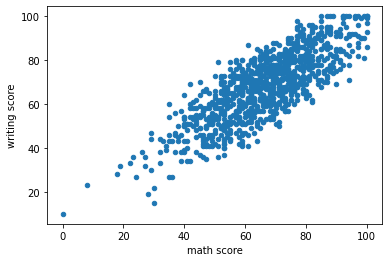

In [250]:
df.plot(x = "math score", y = "writing score", kind = "scatter")

`-` 읽기 점수와 쓰기 점수 비교

* 음.. 읽기와 쓰기는 굉장히 연관성이 깊어 보임

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

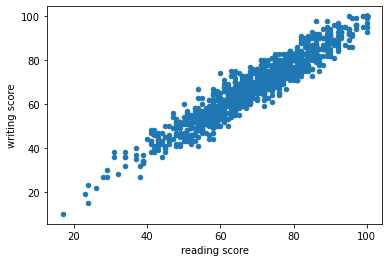

In [251]:
df.plot(x = "reading score", y = "writing score", kind = "scatter")

## 실습 1. 국가지표 분석하기

In [254]:
import pandas as pd
%matplotlib inline

df = pd.read_csv("data/world_indexes.csv")

In [256]:
df.head()

,Id,Human Development Index HDI-2014,Gini coefficient 2005-2013,Adolescent birth rate 15-19 per 100k 20102015,Birth registration funder age 5 2005-2013,Carbon dioxide emissionsAverage annual growth,Carbon dioxide emissions per capita 2011 Tones,Change forest percentable 1900 to 2012,Change mobile usage 2009 2014,Consumer price index 2013,...,Renewable sources percentage of total 2012,Research and development expenditure 2005-2012,Secondary 2008-2014,Share of seats in parliament percentage held by womand 2014,Stock of immigrants percentage of population 2013,Taxes on income profit and capital gain 205 2013,Tertiary -2008-2014,Total tax revenue of GDP 2005-2013,Tuberculosis rate per thousands 2012,Under-five Mortality 2013 thousands
0,Norway,0.943877,26.83,7.834,100.0,0.778925,9.192879,11.914567,5.22,104.194175,...,47.752676,1.65474,111.06130,39.644970,13.772622,31.798391,74.10112,27.288097,0.14,2.8
1,Australia,0.934958,34.01,12.059,100.0,1.090351,16.519210,-4.561812,30.27,107.789440,...,4.632202,2.38562,135.53543,30.530974,27.711793,65.333748,86.33409,21.361426,0.19,4.0
2,Switzerland,0.929613,32.35,1.900,100.0,-1.101254,4.625230,8.567416,16.72,99.317229,...,49.659398,2.87046,96.30638,28.455285,28.906998,22.673299,55.56190,9.759124,0.22,4.2
3,Denmark,0.923328,26.88,5.101,100.0,-1.767733,7.248329,23.029974,1.83,106.057718,...,26.767245,2.98416,124.65927,37.988827,9.909512,39.677938,79.59763,33.395651,0.40,3.5
4,Netherlands,0.921794,28.87,6.165,100.0,-0.252734,10.064490,5.922602,-4.31,107.474154,...,6.671366,2.15676,129.91277,36.888889,11.724418,23.533104,77.34356,19.724059,0.17,4.0


다음 중 가장 연관성이 깊은 지표를 찾기!

1. 기대 수명 - 인터넷 사용자 비율

2. 숲 면적 비율 - 탄소 배출 증가율

3. 인터넷 사용자 비율 - 숲 면적 비율

4. 기대 수명 - 탄소 배출 증가율

5. 기대 수명 - 숲 면적 비율

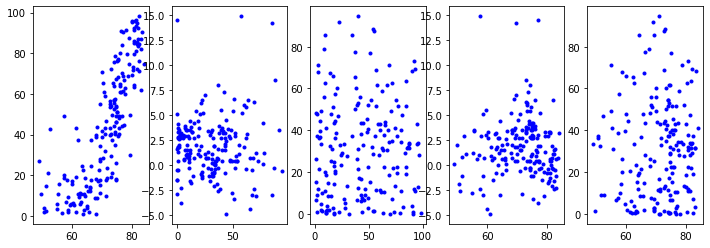

In [272]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,5 ,figsize = (12,4))

ax1,ax2,ax3,ax4,ax5 = axes

ax1.plot("Life expectancy at birth- years",
         'Internet users percentage of population 2014', "b.", data = df)

ax2.plot("Forest area percentage of total land area 2012",
         'Carbon dioxide emissionsAverage annual growth', "b.", data = df)

ax3.plot("Internet users percentage of population 2014",
         'Forest area percentage of total land area 2012', "b.", data = df)

ax4.plot( 'Life expectancy at birth- years',  
         'Carbon dioxide emissionsAverage annual growth',  "b.", data = df)

ax5.plot( 'Life expectancy at birth- years',  
         'Forest area percentage of total land area 2012',  "b.", data = df)

`-` 그래프를 그려 시각화해본 결과 `1. 기대수명-인터넷 사용자 비율`이 가장 연관성이 있어 보인다.